### Business Data Analysis
<br> 

#### This project is centered on reviewing and analyzing businesses. It showcases a multiplicity of different data analysis methods and techniques learned whilst undertaking my course, 'Data Analysis with Python', offered online by the University of Pennsylvania. Further, it utilizes a variety of popular Python libraries for data analysis such as pandas and matplotlib.

<br>

#### The project covers a range of core data analysis skills, including:
&emsp; **1) Reading and inspecting Excel files** <br>
&emsp; **2) Merging and updating data** <br>
&emsp; **3) Querying data** <br>
&emsp; **4) Grouping, summarizing, and statistically analyzing data** <br>
&emsp; **5) Data visualization** <br>
&emsp; **6) Writing and/or updating Excel files** <br>

<br>
<br>

**The data being analyzed are contained in the file 'yelp.xlsx', which consists of data pertaining to a variety of local businesses, collected and published by yelp.com, a popular website for publishing crowd-sourced reviews about businesses.** 
<br>

**The file is comprised of three sheets (with the following coloumns):** <br>
 * **yelp_data:** *'name', 'category_0', 'category_1', 'take_out', 'review_count', 'stars', 'city_id', 'state_id'* <br>
 * **cities:** *'id', 'city'* <br>
 * **states:** *'id', 'state'* <br>
<br>
<br>


In [1]:
#Importing the Python modules to be used 
import pandas as pd 
import openpyxl 
import numpy as np 
import matplotlib.pyplot as plt 

import warnings
warnings.simplefilter("ignore")


### Part One: Loading and Inspecting Excel Data 

**1. Loading and Reading the File**

In [2]:
#Accessing the file, 'yelp.xlsx'
xl = pd.ExcelFile('yelp.xlsx')

#Loading each sheet onto a separate dataframe 
df_yelp = xl.parse('yelp_data')
df_cities = xl.parse('cities')
df_states = xl.parse('states')


**2. General Inspections of the File**

In [3]:
#Inspecting the shape (rows x coloumns) of first sheet
shape = df_yelp.shape
print('Number of coloumns:', shape[1])
print('Number of rows:', shape[0])


Number of coloumns: 8
Number of rows: 600


In [4]:
#Inspecting the coloumn headers of the first sheet
print('Coloumn headers in the sheet \'yelp_data\':')
for column in list(df_yelp.columns):
    print(column)

Coloumn headers in the sheet 'yelp_data':
name
category_0
category_1
take_out
review_count
stars
city_id
state_id


In [5]:
#Display the first 5 enteries of data in the first sheet
print('The first 5 enteries off the \'yelp_data\' sheet:')
df_yelp.head()


The first 5 enteries off the 'yelp_data' sheet:


,name,category_0,category_1,take_out,review_count,stars,city_id,state_id
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1


### Part Two: Merging and Updating Data 


**1. Merging Sheets**

In [6]:
#Merging the three sheets, 'yelp_data', 'cities', and 'states', into one dataframe 'df'

#Merging the two dataframes 'df_yelp' and 'df_cities'

df = pd.merge(left=df_yelp, right=df_cities,           #specifying the dataframes to merge 
            how='inner',                               #specifying the type of data merging 
            left_on='city_id', right_on='id')        #specifying the common coloumns to merge on

#Merging the dataframes 'df' and 'df_states' 

df = pd.merge(left=df, right=df_states, 
              how='inner', 
              left_on='state_id', 
              right_on='id')


#Displaying the first 5 rows after merging 
print('Dataframe after merging:')
df.head()


Dataframe after merging:


,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,id_x,city,id_y,state
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,1,Bellevue,1,PA
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,1,Bellevue,1,PA
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,1,Bellevue,1,PA
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,1,Bellevue,1,PA
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,1,Bellevue,1,PA


**2. Updating the Dataframe**

In [7]:
#Deleting duplicate coloumns 
df = df.drop(['id_x', 'id_y'],axis=1)

#Renaming the coloumns, 'category_0' and 'category_1', to be more representative of their data 

df.rename(columns={'category_0': 'business type',       #specifying the old (left) and new (right) coloumn titles
          'category_1': 'service type'}, 
          inplace=True)

#Displaying the coloumn titles again 
print('Coloumn titles after renaming:\n', list(df.columns))
print('')

#Rearranging the coloumns order 
rearranged_coloumns = ['name', 'business type', 'service type', 'stars', 'review_count', 'take_out', 'city', 'city_id', 'state', 'state_id']
df = df.reindex(columns=rearranged_coloumns)


#To preview the dataframe after updates 
print('Updated dataframe:')
df.head()


Coloumn titles after renaming:
 ['name', 'business type', 'service type', 'take_out', 'review_count', 'stars', 'city_id', 'state_id', 'city', 'state']

Updated dataframe:


,name,business type,service type,stars,review_count,take_out,city,city_id,state,state_id
0,China Sea Chinese Restaurant,Restaurants,Chinese,2.5,11,True,Bellevue,1,PA,1
1,Discount Tire Center,Tires,Automotive,4.5,24,False,Bellevue,1,PA,1
2,Frankfurters,Restaurants,Hot Dogs,4.5,3,True,Bellevue,1,PA,1
3,Fred Dietz Floral,Shopping,Flowers & Gifts,4.0,6,False,Bellevue,1,PA,1
4,Kuhn's Market,Food,Grocery,3.5,8,False,Bellevue,1,PA,1


In [8]:
#Displaying only the coloumns 'business type' and 'service type'
print('The following table displays the type of business for each business listed and the service they offer:')
df[['business type', 'service type']]


The following table displays the type of business for each business listed and the service they offer:


,business type,service type
0,Restaurants,Chinese
1,Tires,Automotive
2,Restaurants,Hot Dogs
3,Shopping,Flowers & Gifts
4,Food,Grocery
...,...,...
595,Local Services,Recycling Center
596,Local Services,Recycling Center
597,Restaurants,Fast Food
598,Shopping,Heating & Air Conditioning/HVAC


### Part Three: Querying Data <br>
**General queries** 

***1. Report businesses located in Las Vegas only***

In [9]:
#Filtering data for Las Vegas (LA) enteries only 
LA_filter = df['city'] == 'Las Vegas'
df_LA = df[LA_filter]

#reporting businesses located in LA only 
print('The following table displays businesses located in Las Vegas only:')
df_LA



The following table displays businesses located in Las Vegas only:


,name,business type,service type,stars,review_count,take_out,city,city_id,state,state_id
430,Reliable Tax Services,Financial Services,Accountants,4.5,3,False,Las Vegas,12,NV,2
431,Paradise Electro Stimulations,Shopping,Adult,4.5,4,False,Las Vegas,12,NV,2
432,The Studio,Shopping,Adult,5.0,7,False,Las Vegas,12,NV,2
433,Boomer's Bar,Bars,American (Traditional),3.5,19,False,Las Vegas,12,NV,2
434,Omelet House,Breakfast & Brunch,American (Traditional),4.5,703,True,Las Vegas,12,NV,2
...,...,...,...,...,...,...,...,...,...,...
558,It's Paradise Boutique,Shopping,Fashion,3.5,3,False,Las Vegas,12,NV,2
559,Smog Busters Repair Center,Automotive,Smog Check Stations,4.0,3,False,Las Vegas,12,NV,2
560,A & M Enterprises,Financial Services,Tax Services,2.5,3,False,Las Vegas,12,NV,2
561,Gray Line of Las Vegas,Hotels & Travel,Transportation,1.5,3,False,Las Vegas,12,NV,2


***2. Report businesses classified as 'Restaurants' (in either categories, business/service type)***

In [10]:
#Filtering data for 'Restaurants' in coloumns 'business type' and 'service type'  
rest_filter1 = df['business type'] == 'Restaurants'
rest_filter2 = df['service type'] == 'Restaurants'
df_restaurants = df[(rest_filter1 | rest_filter2)]         #i.e., restaurants is 'either' in first 'or' in second coloumn

#reporting businesses classified as 'Restaurants' only 
print('The following table displays all the restaurants featured in the data set:')
df_restaurants


The following table displays all the restaurants featured in the data set:


,name,business type,service type,stars,review_count,take_out,city,city_id,state,state_id
0,China Sea Chinese Restaurant,Restaurants,Chinese,2.5,11,True,Bellevue,1,PA,1
2,Frankfurters,Restaurants,Hot Dogs,4.5,3,True,Bellevue,1,PA,1
6,Luigi's Pizzeria,Restaurants,Pizza,4.0,18,True,Bellevue,1,PA,1
8,R & B's Pizza Place,Restaurants,Pizza,4.0,17,True,Bellevue,1,PA,1
9,Rusty Nail,Restaurants,American (Traditional),3.5,32,True,Bellevue,1,PA,1
...,...,...,...,...,...,...,...,...,...,...
536,Little Caesars Pizza,Restaurants,Pizza,4.0,4,True,Las Vegas,12,NV,2
537,Pho So 1,Restaurants,Vietnamese,3.5,763,True,Las Vegas,12,NV,2
538,Rice To-Go,Restaurants,Chinese,3.0,19,True,Las Vegas,12,NV,2
539,Wienerschnitzel,Restaurants,Fast Food,1.0,3,False,Las Vegas,12,NV,2


***3. Report businesses classified as either 'Restaurants' or 'Bars' (in both categories)***

In [11]:
#Filtering data for both 'Restaurants' and 'Bars' simultaneously  
rest_filter = df['business type'].isin(['Restaurants', 'Bars'])
bars_filter = df['service type'].isin(['Restaurants', 'Bars'])
df_rest_bars = df[(rest_filter | bars_filter)]      

#reporting businesses after filtering 
print('The following table displays businesses classified as either restaurants or bars:')
df_rest_bars
      

The following table displays businesses classified as either restaurants or bars:


,name,business type,service type,stars,review_count,take_out,city,city_id,state,state_id
0,China Sea Chinese Restaurant,Restaurants,Chinese,2.5,11,True,Bellevue,1,PA,1
2,Frankfurters,Restaurants,Hot Dogs,4.5,3,True,Bellevue,1,PA,1
6,Luigi's Pizzeria,Restaurants,Pizza,4.0,18,True,Bellevue,1,PA,1
8,R & B's Pizza Place,Restaurants,Pizza,4.0,17,True,Bellevue,1,PA,1
9,Rusty Nail,Restaurants,American (Traditional),3.5,32,True,Bellevue,1,PA,1
...,...,...,...,...,...,...,...,...,...,...
537,Pho So 1,Restaurants,Vietnamese,3.5,763,True,Las Vegas,12,NV,2
538,Rice To-Go,Restaurants,Chinese,3.0,19,True,Las Vegas,12,NV,2
539,Wienerschnitzel,Restaurants,Fast Food,1.0,3,False,Las Vegas,12,NV,2
593,Sporting Chance Saloon,Bars,Nightlife,3.5,7,False,North Las Vegas,13,NV,2


***4. Report Restaurants and Bars located in Las Vegas only*** 

In [12]:
#Adding a city filter to extract those in LA 
LA_filter = df['city'] == 'Las Vegas'
LA_rest_bars = df[LA_filter & (rest_filter | bars_filter)]       #i.e., the city filter AND either restaurants filter OR bars filter must be true

#reporting bars and/or restaurans in LA 
print('The following table lists businesses in Las Vegas that are classified as restaurants or bars:')
LA_rest_bars


The following table lists businesses in Las Vegas that are classified as restaurants or bars:


,name,business type,service type,stars,review_count,take_out,city,city_id,state,state_id
433,Boomer's Bar,Bars,American (Traditional),3.5,19,False,Las Vegas,12,NV,2
450,Hard Hat Lounge,Dive Bars,Bars,3.5,31,False,Las Vegas,12,NV,2
451,Huntridge Tavern,Dive Bars,Bars,4.0,50,False,Las Vegas,12,NV,2
452,Jack's Pub,Pubs,Bars,2.5,20,False,Las Vegas,12,NV,2
453,Moon Doggies,Dive Bars,Bars,4.0,85,False,Las Vegas,12,NV,2
515,Jake's Bar,Bars,Nightlife,4.5,12,False,Las Vegas,12,NV,2
527,Capriotti's Sandwich Shop,Restaurants,Sandwiches,4.0,271,True,Las Vegas,12,NV,2
528,Carl's Jr,Restaurants,Fast Food,1.5,5,True,Las Vegas,12,NV,2
529,Chapala's Mexican Restaurant,Restaurants,Mexican,3.0,19,True,Las Vegas,12,NV,2
530,China Star,Restaurants,Chinese,3.0,45,True,Las Vegas,12,NV,2


**More specific queries**

***5. How many Beauty and Spa centers are there in the city of Henderson?***

In [13]:
#Filtering cities for Henderson
Henderson_filter = df['city'] == 'Henderson'

#filtering businesses for Beauty & Spa centers
BnS_filter1 = df['business type'] == 'Beauty & Spas'
BnS_filter2 = df['service type'] == 'Beauty & Spas'

#creating a filtered dataframe 
df_BnS_Henderson = df[Henderson_filter & (BnS_filter1 | BnS_filter2)]

#Reporting the number of beauty & spa centers
print('The total number of Beauty and Spa centers in Henderson is:', len(df_BnS_Henderson))


The total number of Beauty and Spa centers in Henderson is: 14


***6. What type of service does the business 'Dairy Queen' offer?***

In [14]:
#Filtering business names for 'Dairy Queen'
DQ_filter = df['name'] == 'Dairy Queen'
df_DQ = df[DQ_filter]
print('Dairy Queen offers:', df_DQ['service type'].values[0])


Dairy Queen offers: Ice Cream & Frozen Yogurt


***7. How many 'dive bars' are there in Las Vegas? Can you recommend one in that city with at least a 4 star rating?***


In [15]:
#Filtering data by city 
LA_filter = df['city'] == 'Las Vegas' 

#filtering data for dive bars in business and service categories
divebars_filter1 = df['business type'] == 'Dive Bars'
divebars_filter2 = df['service type'] == 'Dive Bars'

#creating a filtered dataframe 
LA_divebars = df[LA_filter & (divebars_filter1 | divebars_filter2)]

#reporting the number of dive bars 
print('The total number of dive bars in Las Vegas is:', len(LA_divebars))
print('')


#Recommending a dive bar with at least a 4-star rating (randomly)
#adding a rating filter
rating_filter = LA_divebars['stars'] >= 4
LA_divebars_filtered = LA_divebars[rating_filter]

#resetting the index of the dataframe LA_divebars
LA_divebars_filtered.reset_index(drop=True, inplace=True)

#getting a random index to make a random recommendation
import random 
random_index = random.randint(0, len(LA_divebars_filtered)-1)

#reporting a random LA dive bar with 4-star rating or above 
random_divebar = LA_divebars_filtered.iloc[random_index]
print('Here\'s your recommendation of a highly rated dive bar in LA:', random_divebar['name'])



The total number of dive bars in Las Vegas is: 3

Here's your recommendation of a highly rated dive bar in LA: Moon Doggies


***8. Which city has the largest number of pizza shops?*** <br>  
***Can you recommend a random one with at least a 4-star rating and which offers take-outs?***

In [16]:
#Filtering data for pizza restaurants
pizza_filter1 = df['business type'].str.contains('Pizza')
pizza_filter2 = df['service type'].str.contains('Pizza')

#creating a dataframe with pizza businesses only
df_pizza = df[(pizza_filter1 | pizza_filter2)]

#Grouping and filtering data based on city
cities = df_pizza.groupby('city').groups         #returns a dictionary 
maxcount = None 
maxcity = None 
for city, val in cities.items(): 
    if maxcount is None or len(val) > maxcount:        #to get the city with most pizza restaurants
        maxcount = len(val)
        maxcity = city 
    else:
        continue 

#Reporting the result 
print('The city with the most pizza shops is:', maxcity)
print('')


#Recommending a random pizza shop with a 4-star rating or above and which offers take-outs
#adding filters for each of the requirements
city_filter = df_pizza['city'] == maxcity
rating_filter = df_pizza['stars'] >= 4 
take_outs_filter = df_pizza['take_out'] == True

#creating a dataframe with data meeting the specified requirements 
df_pizza_filtered = df_pizza[city_filter & rating_filter & take_outs_filter]

#resetting the index of the dataframe 
df_pizza_filtered.reset_index(drop=True, inplace=True)

#selecting one at random 
random_indx = random.randint(0, len(df_pizza_filtered)-1)
random_pizza = df_pizza_filtered['name'].iloc[random_indx]

#reporting the results 
print('Here is your recommendation:', random_pizza)


The city with the most pizza shops is: Pittsburgh

Here is your recommendation: Eddie's Pizza Haus


### Part Four: Grouping, Summarizing, and Statistically Analyzing Data 

**1. Report the mean and standard deviation of rating scores of businesses for each city separately**

In [17]:
#grouping data by city and selecting statistics to perform
city_stats = df.groupby('city').agg([np.mean, np.std])['stars']

#reporting the rating mean and standard deviations per city
print('The following table displays the mean and standard deviation scores of businesses per city:')
city_stats


The following table displays the mean and standard deviation scores of businesses per city:


,mean,std
city,,
Bellevue,3.750000,0.783349
Braddock,4.750000,0.353553
Carnegie,3.454545,0.688495
Henderson,3.419231,0.906060
Homestead,3.280488,0.837024
Las Vegas,3.398496,1.042214
Mc Kees Rocks,3.700000,0.856349
Mount Lebanon,3.125000,1.108678
Munhall,3.000000,0.816497


**2. Report the mean star ratings and total number of reviews of restaurants for each city separately**

In [18]:
#filtering dataframe for resturants only 
rest_filter1 = df['business type'] == 'Restaurants'
rest_filter2 = df['service type'] == 'Restaurants'
df_restaurants = df[(rest_filter1 | rest_filter2)]

#grouping data by city and selecting statistics for each coloumn to analyze
city_rest_stats = df_restaurants.groupby('city').agg({'stars': np.mean, 'review_count': np.sum})

#reporting the mean of star ratings and sum of reviews for restaurants per city 
print('The following table demonstrates the average rating score and total sum of reviews for restaurants per city:')
city_rest_stats


The following table demonstrates the average rating score and total sum of reviews for restaurants per city:


,stars,review_count
city,,
Bellevue,3.916667,84
Carnegie,3.125000,104
Henderson,3.181818,1127
Homestead,2.500000,6
Las Vegas,3.153846,2875
Mc Kees Rocks,3.333333,22
Munhall,3.500000,19
North Las Vegas,3.000000,12
Pittsburgh,3.203704,1809


**2.2. Based on the results, which city has the best restaurants?**

In [19]:
#traversing through the dataframe to get the name of the city with the highest mean rating
maxrating = None 
maxcity = None 
for rating in city_rest_stats['stars']:
    if maxrating is None or rating > maxrating: 
        maxrating = rating 
        rating_filt = city_rest_stats['stars'] == rating 
        maxcity = city_rest_stats[rating_filt].index.values
    else:
        continue

#Reporting city whose restaurants received the highest mean rating
print('The city with the best restaurants:', maxcity[0])


The city with the best restaurants: West Mifflin


**3. Create a pivot table showing the mean star rating and mean reviews of businesses, grouping the results by city**

In [20]:
#creating the pivot table 
pivot_tab = pd.pivot_table(df,              #specifying the dataframe to analyze
                index=['city'],             #specifying the coloumn to group data by 
                values=['stars', 'review_count'],         #specifying the coloumns to analyze 
                aggfunc=np.mean)            #specifying the statistic to perform 


#reporting the results of the table 
print('The following pivot table displays the average star rating and review count for businesses per city:')
pivot_tab 


The following pivot table displays the average star rating and review count for businesses per city:


,review_count,stars
city,,
Bellevue,13.166667,3.750000
Braddock,14.500000,4.750000
Carnegie,13.590909,3.454545
Henderson,33.323077,3.419231
Homestead,23.243902,3.280488
Las Vegas,54.330827,3.398496
Mc Kees Rocks,10.700000,3.700000
Mount Lebanon,6.250000,3.125000
Munhall,22.750000,3.000000


**4. Create a pivot table showing the mean star rating and total sum of reviews for businesses classified as 'Hotels & Travel', <br> grouping the results by state and city**

In [21]:
#filtering data for businesses classified as Hotels & Travel
Hotels_filter1 = df['business type'] == 'Hotels & Travel'
Hotels_filter2 = df['service type'] == 'Hotels & Travel'

#creating dataframe with hotels & travel businesses 
df_Hotels = df[(Hotels_filter1 | Hotels_filter2)]

#creating a pivot table to calculate their mean star ratings and sum of reviews 
pivot_Hotels = pd.pivot_table(df_Hotels, 
                            index=['state', 'city'],                #grouping results by state followed by city 
                            values=['stars', 'review_count'],         #specifying the coloumns to analyze
                            aggfunc={'stars': np.mean, 'review_count': np.sum})          #specifying the calculation to perform per coloumn

#reporting the pivot table
print('The following pivot table displays the average star ratings and total sum of reviews\nfor hotels & travel businesses, based on their state and city locations:')
pivot_Hotels


The following pivot table displays the average star ratings and total sum of reviews
for hotels & travel businesses, based on their state and city locations:


review_count  stars
state city                             
NV    Las Vegas              559    2.1
PA    Carnegie                11    3.5
      Homestead               16    4.0
      Pittsburgh             190    3.5
      West Mifflin             3    4.5

### Part Five: Data Visualization 

**1. Create a histogram to compare the frequency distribution of rating scores of businesses in Pittsburgh vs. Las Vegas**

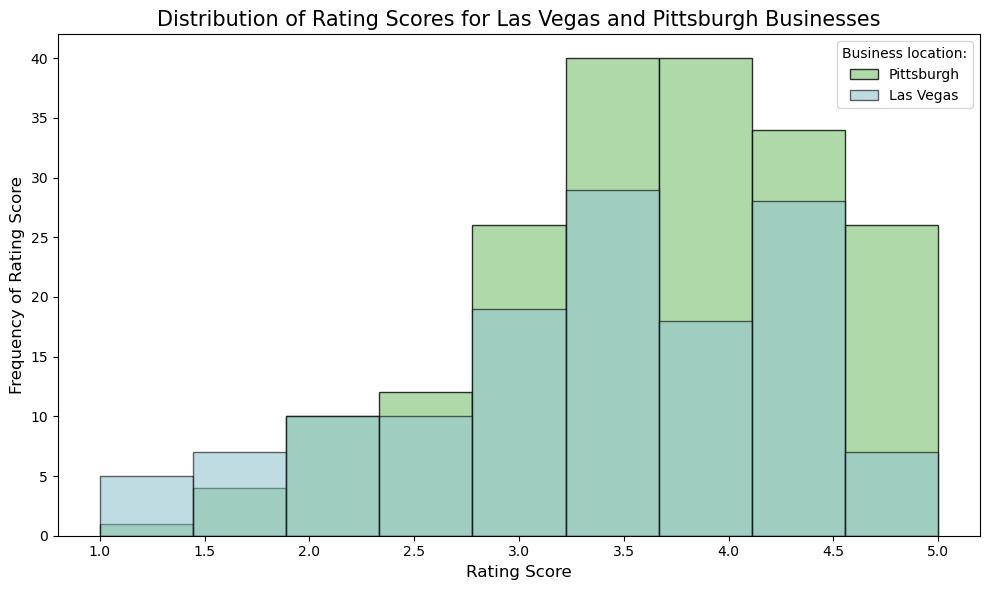

In [22]:
#filtering data for cities Pittsburgh and Las Vegas
Pitts_filter = df['city'] == 'Pittsburgh'
Pitts_rating = df[Pitts_filter]['stars']

LA_filter = df['city'] == 'Las Vegas'
LA_rating = df[LA_filter]['stars'] 


#Setting the figure size 
plt.figure(figsize=(10,6))

#plotting histogram to show frequency distribution of different businesses ratings in Pittsburgh
plt.hist(Pitts_rating,             
         label='Pittsburgh',        #setting the label/description of the histogram
         color='#9cd095',           #specifying the color of histogram bars
         alpha=0.8,                #setting the degree of bars transparency
         linewidth=1, edgecolor='k',   #setting the bar edges' width and color
         bins='auto'                  #divides the bins along the x-axis automatically
         )

#plotting histogram to show frequency distribution of different businesses ratings in LA
plt.hist(LA_rating, 
        label='Las Vegas',
        color='#95c6d0',
        alpha=0.6,                   
        linewidth=1, edgecolor='k',    
        bins='auto')

#Adding a title to the histogram 
plt.title('Distribution of Rating Scores for Las Vegas and Pittsburgh Businesses', fontsize=15)
#Adding labels to the histogram axes 
plt.xlabel('Rating Score', fontsize=12)       
plt.ylabel('Frequency of Rating Score', fontsize=12)
#Adding a legend to describe the histogram better 
plt.legend(title='Business location:', loc='best')      #specifies the title and location of the legend

#To display the histogram 
plt.tight_layout()
plt.show()


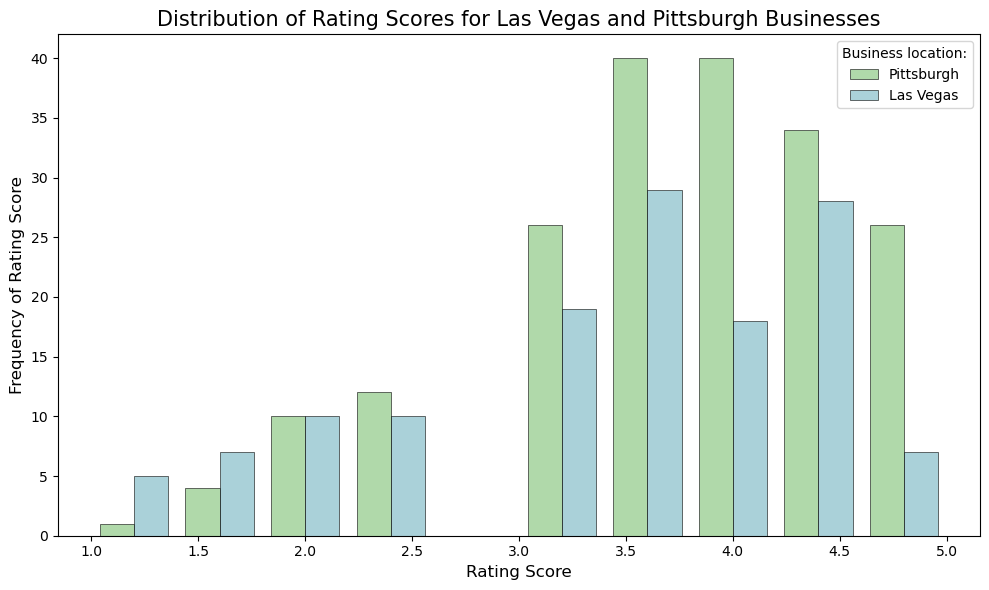

In [23]:
#Alternatively, comparison could be presented better using a histogram with 'non-overlapping' bars 
#plotting a non-overlapping histogram
plt.figure(figsize=(10,6))
plt.hist([Pitts_rating, LA_rating], 
          label=['Pittsburgh', 'Las Vegas'],
          color=['#9cd095', '#95c6d0'],
          alpha=0.8,
          linewidth=0.5, edgecolor='k',
          bins='auto')

#Adding a title 
plt.title('Distribution of Rating Scores for Las Vegas and Pittsburgh Businesses', fontsize=15)
#Adding labels to histogram axes
plt.xlabel('Rating Score', fontsize=12)
plt.ylabel('Frequency of Rating Score', fontsize=12)
#Adding a legend to describe the histogram better
plt.legend(title='Business location:', loc='best')

#To display the histogram 
plt.tight_layout()
plt.show()


**2. Is the popularity of a given business (measured by reviews count) a good indication of the qualify <br> of its services (measured by star rating)?** <br>
<br>
Create a scatter plot to assess the relationship between popularity and service quality along 3 different classes of <br> businesses: 'Health & Medical', 'Beauty & Spas', and 'Fashion'

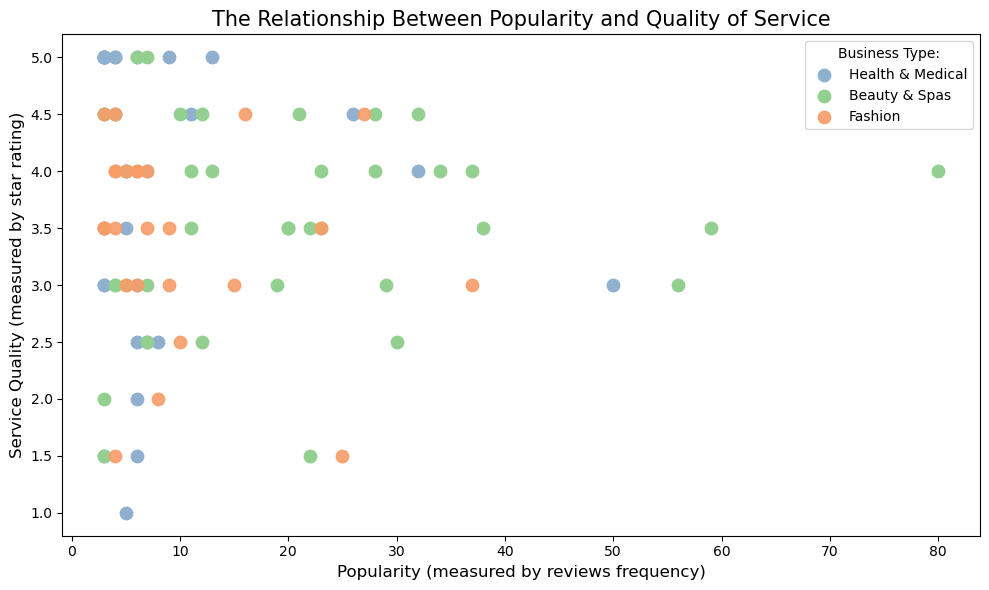

In [24]:
#filtering data for the three types of businesses 
Health_filter1 = df['business type'] == 'Health & Medical'
Health_filter2 = df['service type'] == 'Health & Medical'
df_Health = df[Health_filter1 | Health_filter2]

Beauty_filter1 = df['business type'] == 'Beauty & Spas'
Beauty_filter2 = df['service type'] == 'Beauty & Spas'
df_Beauty = df[Beauty_filter1 | Beauty_filter2]

Fashion_filter1 = df['business type'] == 'Fashion'
Fashion_filter2 = df['service type'] == 'Fashion'
df_Fashion = df[Fashion_filter1 | Fashion_filter2]


#Creating a scatterplot for each class of business to compare popularity to service quality for each
#first, setting the figure size 
plt.figure(figsize=(10,6))

#plotting the data for health and medical industries
plt.scatter(df_Health['review_count'],           #specifying the data points to plot along the x-axis
            df_Health['stars'],                 #specifying the data points to plot along the y-axis
            label='Health & Medical',           #labeling the data points
            marker='o',                         #setting the marker type (circle-shaped)
            s=80,                              #setting the marker size 
            c='#90b0d0',                      #setting the marker color
            alpha=1)                          #setting the degree of transparency of marker 

#plotting the data for the beauty industries
plt.scatter(df_Beauty['review_count'],           
            df_Beauty['stars'],                
            label='Beauty & Spas',                    
            marker='o',                      
            s=80,                           
            c='#93d090',
            alpha=1)                       


#plotting the data for the fashion industries 
plt.scatter(df_Fashion['review_count'],
            df_Fashion['stars'],
            label='Fashion',
            marker='o',
            s=80,
            c='#f89d68',
            alpha=0.9)

#Adding a title to the scatter plot 
plt.title('The Relationship Between Popularity and Quality of Service', fontsize=15)
#Adding labels to the scatterplot axes 
plt.xlabel('Popularity (measured by reviews frequency)', fontsize=12)
plt.ylabel('Service Quality (measured by star rating)', fontsize=12)
#Adding a legend
plt.legend(title='Business Type:', loc='best')

#To display the scatterplot 
plt.tight_layout()
plt.show()


**3. Create a pivot table that shows the mean star ratings for Health & Medical businesses located in three different <br> cities: 'Pittsburgh', 'Henderson', and 'Las Vegas'**

**Plot a bar chart to compare the mean star ratings in the three cities**

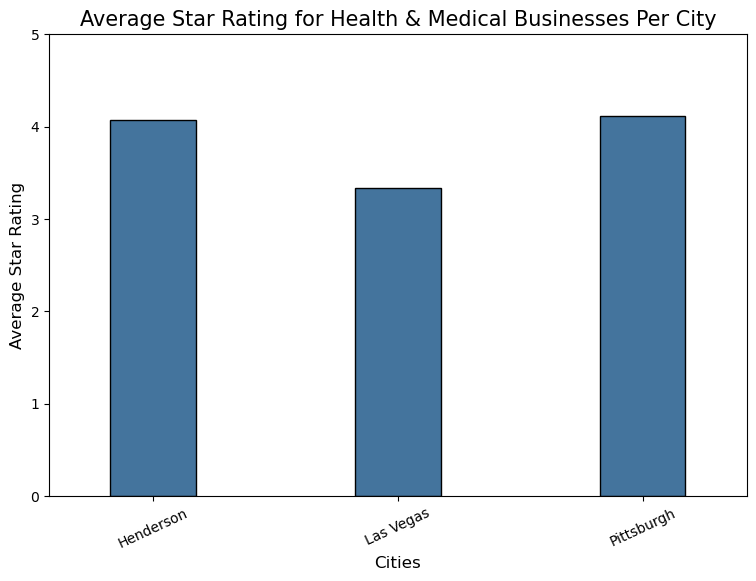

In [25]:
#filtering data for Health & Medical 
Health_filter1 = df['business type'] == 'Health & Medical'
Health_filter2 = df['service type'] == 'Health & Medical'

#filtering data for cities 
Pitts_filter = df['city'] == 'Pittsburgh'
Henderson_filter = df['city'] == 'Henderson'
LA_filter = df['city'] == 'Las Vegas'

#creating a dataframe with the filtered data 
df_HealthByCity = df[(Health_filter1 | Health_filter2) & (Pitts_filter | Henderson_filter | LA_filter)]


#Creating a pivot table to calculate mean star rating per city 
pivot_HealthByCity = pd.pivot_table(df_HealthByCity, 
                                index=['city'], 
                                values=['stars'], 
                                aggfunc=np.mean)


#Plotting a bar chart to compare the means between cities
pivot_HealthByCity.plot(figsize=(9,6),       
                        kind='bar',
                        color='#44749d',
                        linewidth=1,
                        edgecolor='k',
                        width=0.35,           
                        legend=False,
                        )         

#Adding title and labeling the axes 
plt.title('Average Star Rating for Health & Medical Businesses Per City', fontsize=15)
plt.xlabel('Cities', fontsize=12)
plt.ylabel('Average Star Rating', fontsize=12)
#adjusting the tick label's rotation
plt.xticks(rotation=25)
#adjusting the y-axis scaler 
plt.ylim(0, 5)

#To display the bar chart 
plt.show()


### Part Six: Writing and/or Updating Excel Files 

**1. Writing a New Excel File**
<br>
<br> 
Say we want to filter data for businesses classified as either restaurants or bars,
store them into a dataframe, <br> and write a new Excel file with that filtered dataframe

In [26]:
#First, filtering data for 'Restaurants' or 'Bars' 
business_filter = df['business type'].isin(['Restaurants', 'Bars']) 
service_filter = df['service type'].isin(['Restaurants', 'Bars'])
df_RnB = df[business_filter | service_filter]

#Writing the dataframe, df_RnB, into the file 'yelp_filtered.xlsx' 
df_RnB.to_excel('yelp_filtered.xlsx',                  #specifying file path and/or name
                sheet_name='Restaurants and Bars',     #specifying sheet name
                index=False)                           #removing the index coloumn


#in order to preview the file created 
try:
    df_newfile = pd.read_excel('yelp_filtered.xlsx')
except:
    print('Error: file does not exist or cannot be accessed.')

#to preview the first 5 enteries in the new file 
df_newfile.head()


,name,business type,service type,stars,review_count,take_out,city,city_id,state,state_id
0,China Sea Chinese Restaurant,Restaurants,Chinese,2.5,11,True,Bellevue,1,PA,1
1,Frankfurters,Restaurants,Hot Dogs,4.5,3,True,Bellevue,1,PA,1
2,Luigi's Pizzeria,Restaurants,Pizza,4.0,18,True,Bellevue,1,PA,1
3,R & B's Pizza Place,Restaurants,Pizza,4.0,17,True,Bellevue,1,PA,1
4,Rusty Nail,Restaurants,American (Traditional),3.5,32,True,Bellevue,1,PA,1


**2. Writing New Data into an Existing Excel File**
<br>
<br>
This time I'll extract restaurants and bars specifically located in Las Vegas, store it into
a new dataframe, df_LA_RnB, <br> and write it into a new sheet in the 'yelp_filtered.xlsx' file

In [27]:
#filtering data for LA restaurants and bars 
LA_filter = df_RnB['city'] == 'Las Vegas'
df_LA_RnB = df_RnB[LA_filter]

#Writing dataframe df_LA_RnB into a new sheet 
with pd.ExcelWriter('yelp_filtered.xlsx', engine='openpyxl', mode='a') as writer: 
    df_LA_RnB.to_excel(writer, sheet_name='LA Restaurants and Bars', index=False)

    
#to preview the data in the new sheet
try: 
    xl = pd.ExcelFile('yelp_filtered.xlsx')
    df_newsheet = xl.parse('LA Restaurants and Bars')
except:
    print('Error: sheet does not exist or cannot be accessed.')

#to preview the first 5 enteries 
df_newsheet.head()

,name,business type,service type,stars,review_count,take_out,city,city_id,state,state_id
0,Boomer's Bar,Bars,American (Traditional),3.5,19,False,Las Vegas,12,NV,2
1,Hard Hat Lounge,Dive Bars,Bars,3.5,31,False,Las Vegas,12,NV,2
2,Huntridge Tavern,Dive Bars,Bars,4.0,50,False,Las Vegas,12,NV,2
3,Jack's Pub,Pubs,Bars,2.5,20,False,Las Vegas,12,NV,2
4,Moon Doggies,Dive Bars,Bars,4.0,85,False,Las Vegas,12,NV,2


**3. Appending Data into Existing Sheets in an Existing Excel File**
<br>
<br>
Lastly, I'll filter the data further, say to extract businesses classified as 'Hotels & Travel' as well as those in LA only, 
and append the filtered data <br> into the two sheets I created earlier in the 'yelp_filtered.xlsx' file


In [28]:
#Filtering data for 'Hotels & Travel' 
Hotels_filter1 = df['business type'] == 'Hotels & Travel'
Hotels_filter2 = df['service type'] == 'Hotels & Travel'
df_Hotels = df[Hotels_filter1 | Hotels_filter2]

#Extracting those in LA 
LA_filter = df_Hotels['city'] == 'Las Vegas'
df_LA_Hotels = df_Hotels[LA_filter]


#Appending the two dataframes, df_Hotels and df_LA_Hotels, into the two existing sheets
with pd.ExcelWriter('yelp_filtered.xlsx', engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer: 
    #specifying the workbook with the existing data
    writer.book = openpyxl.load_workbook('yelp_filtered.xlsx')
    #appending the dataframe df_Hotels to the 'Restaurants and Bars' sheet
    df_Hotels.to_excel(writer, 
                    sheet_name='Restaurants and Bars',        #specifying the sheet to append to 
                    index=False,                              #to remove unnecessary index coloumn 
                    header=False,                             #to remove unnecessary coloumn headers (of df_Hotels)
                    startrow=(len(df_RnB)+1))                 #specifying the starting row for appending new data


    #appending the dataframe df_LA_Hotels to the 'LA Restaurants and Bars' sheet
    df_LA_Hotels.to_excel(writer,
                        sheet_name='LA Restaurants and Bars',
                        index=False,
                        header=False,
                        startrow=(len(df_LA_RnB)+1))


#Renaming the sheets to match current data
#first, loading the file into a workbook object
workbook_obj = openpyxl.load_workbook('yelp_filtered.xlsx')
#Getting the original sheet names
sheet_1 = workbook_obj['Restaurants and Bars']
sheet_2 = workbook_obj['LA Restaurants and Bars']

#Changing the sheet names 
sheet_1.title = 'Leisure Businesses'
sheet_2.title = 'LA Leisure Businesses'

#saving the workbook with the new updates
workbook_obj.save('yelp_filtered.xlsx')


In [29]:
#To check if the data were appended successfully (& the other updates)
xl = pd.ExcelFile('yelp_filtered.xlsx')
df_sheet1 = xl.parse('Leisure Businesses')
df_sheet2 = xl.parse('LA Leisure Businesses')

#displaying the last 5 enteries in the first sheet
print('Last 5 enteries in sheet \'Leisure Businesses\':')
df_sheet1.tail()


Last 5 enteries in sheet 'Leisure Businesses':


,name,business type,service type,stars,review_count,take_out,city,city_id,state,state_id
107,Palace Station Hotel & Casino,Hotels & Travel,Arts & Entertainment,2.5,526,True,Las Vegas,12,NV,2
108,Econo Lodge,Hotels & Travel,Event Planning & Services,2.0,13,False,Las Vegas,12,NV,2
109,El Mirador,Hotels & Travel,Event Planning & Services,1.0,5,False,Las Vegas,12,NV,2
110,Gray Line of Las Vegas,Hotels & Travel,Transportation,1.5,3,False,Las Vegas,12,NV,2
111,AAA,Hotels & Travel,Travel Services,3.5,12,False,Las Vegas,12,NV,2


In [30]:
#displaying the last 5 enteries in the second sheet
print('Last 5 enteries in sheet \'LA Leisure Businesses\':')
df_sheet2.tail()


Last 5 enteries in sheet 'LA Leisure Businesses':


,name,business type,service type,stars,review_count,take_out,city,city_id,state,state_id
19,Palace Station Hotel & Casino,Hotels & Travel,Arts & Entertainment,2.5,526,True,Las Vegas,12,NV,2
20,Econo Lodge,Hotels & Travel,Event Planning & Services,2.0,13,False,Las Vegas,12,NV,2
21,El Mirador,Hotels & Travel,Event Planning & Services,1.0,5,False,Las Vegas,12,NV,2
22,Gray Line of Las Vegas,Hotels & Travel,Transportation,1.5,3,False,Las Vegas,12,NV,2
23,AAA,Hotels & Travel,Travel Services,3.5,12,False,Las Vegas,12,NV,2
